`Pythonista - Saurus Ztrimus`

# Module 2- Plotting in Financial Markets

## Data visualization and Technical Analysis
'A picture speaks a thousand words' has never been truer in financial markets. Absolutely no one goes through the millions of rows of numbers, we always prefer the data in a plotted form to draw better inferences. This module would cover the plotting, basic technical indicators and our own customisation, and making our own trade calls!
You should target to finish module 2, including the prerequisites, in 1-2 weeks.

## Resources
1. [Matplotlib Tutorials](https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)
2. [Seaborn Tutorials](https://www.youtube.com/playlist?list=PL998lXKj66MpNd0_XkEXwzTGPxY2jYM2d)

## Problem Statements
1. [Query 2.1](#id1)
2. [Query 2.2](#id2)
3. [Query 2.3](#id3)
4. [Query 2.4](#id4)
5. [Query 2.5](#id5)
6. [Query 2.6](#id6)
7. [Query 2.7](#id7)
8. [Query 2.8](#id8)
9. [Query 2.9](#id9)
10. [Query 2.10](#id10)

## <a id=id1>Query 2.1</a>
Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

- Look out for drastic changes in this stock, you have the exact date when these took place, try to fetch the news for this day of this stock
- This would be helpful if we are to train our model to take NLP inputs.

<img src="../images/1.png" alt="Drawing" style="width: 400px;" align="left"/>

#### 2.1.1 Load the week2.csv file into a dataframe.

Add `index_col=0` argument while reading csv file to drop index column(`Unnamed`) from previous dataframe (week2.csv)

In [5]:
import pandas as pd
import numpy as np
stock_data = pd.read_csv('./muthfin2.csv', index_col=0)
stock_data.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
0,MUTHOOTFIN,EQ,2017-05-15,390.70,391.00,396.50,388.50,393.00,392.45,393.38,385865,1.517907e+08,6893,63660,16.50,2017,5,0.000000,Slight or No change
2,MUTHOOTFIN,EQ,2017-05-16,392.45,393.65,400.95,393.25,393.45,394.80,398.01,514200,2.046578e+08,9938,100880,19.62,2017,5,0.598802,Slight positive
6,MUTHOOTFIN,EQ,2017-05-17,394.80,396.90,398.00,392.60,394.10,395.15,394.90,311597,1.230481e+08,6512,116484,37.38,2017,5,0.088652,Slight or No change
8,MUTHOOTFIN,EQ,2017-05-18,395.15,393.00,395.45,375.10,378.85,379.20,386.45,646434,2.498119e+08,11171,238171,36.84,2017,5,-4.036442,Among top losers
10,MUTHOOTFIN,EQ,2017-05-19,379.20,395.00,400.90,357.45,381.00,379.15,382.13,3211995,1.227389e+09,42906,1193472,37.16,2017,5,-0.013186,Slight or No change


#### 2.1.2 Type of `Date` columns

In [6]:
# Date type of "Date" column in stock_data
stock_data.Date.dtype

dtype('O')

**`Date` Columns is type `Object`**

Let's convert Date column in `datatime64[ns]` type

In [7]:
# Changing the `date` column from 'object' type to 'datetime64(ns)' 
stock_data.Date = pd.to_datetime(stock_data.Date)
# Check datatype of Date column
stock_data.Date.dtype

dtype('<M8[ns]')

In [8]:
# Showing dtype('<M8[ns]') is datetime64[ns] type
np.dtype('<M8[ns]') == np.dtype('datetime64[ns]')

True

#### 2.1.3 Convert the Date column to the index of the dataframe

In [9]:
stock_data = stock_data.set_index('Date')
stock_data.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-15,MUTHOOTFIN,EQ,390.70,391.00,396.50,388.50,393.00,392.45,393.38,385865,1.517907e+08,6893,63660,16.50,2017,5,0.000000,Slight or No change
2017-05-16,MUTHOOTFIN,EQ,392.45,393.65,400.95,393.25,393.45,394.80,398.01,514200,2.046578e+08,9938,100880,19.62,2017,5,0.598802,Slight positive
2017-05-17,MUTHOOTFIN,EQ,394.80,396.90,398.00,392.60,394.10,395.15,394.90,311597,1.230481e+08,6512,116484,37.38,2017,5,0.088652,Slight or No change
2017-05-18,MUTHOOTFIN,EQ,395.15,393.00,395.45,375.10,378.85,379.20,386.45,646434,2.498119e+08,11171,238171,36.84,2017,5,-4.036442,Among top losers
2017-05-19,MUTHOOTFIN,EQ,379.20,395.00,400.90,357.45,381.00,379.15,382.13,3211995,1.227389e+09,42906,1193472,37.16,2017,5,-0.013186,Slight or No change


#### 2.1.4 Plot the closing price of each of the days

In [10]:
# Importing necessary package
import matplotlib.pyplot as plt 

# Needed for jupyter notebooks
%matplotlib inline 

# Using the fivethirtyeight matplotlib theme
plt.style.use('fivethirtyeight') 

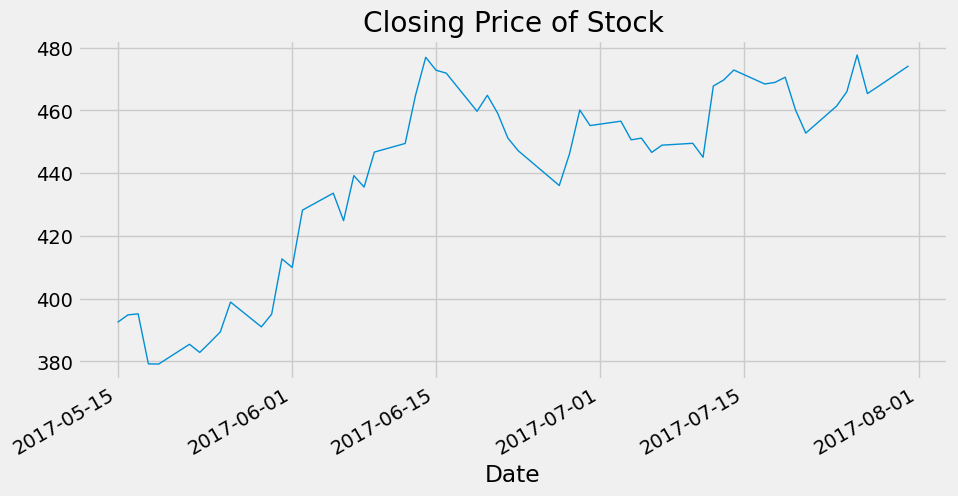

In [11]:
stock_data.plot(y="Close Price", title="Closing Price of Stock", grid=True, legend=False, linewidth=1, figsize=(10,5))
plt.show()

In [16]:
drastic_change_df = stock_data[(stock_data.Month==6) & (stock_data.Year==2017)].head(2)
drastic_change_df.style.apply(lambda x:['background: #d65f5f' if x.name=="Close Price" else '' for i in x])

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00,MUTHOOTFIN,EQ,412.650000,412.600000,417.950000,403.350000,409.750000,409.950000,410.180000,987025,404858166.750000,21362,545941,55.310000,2017,6,-0.654308,Slight negative
2017-06-02 00:00:00,MUTHOOTFIN,EQ,409.950000,414.700000,432.000000,408.700000,427.700000,428.200000,420.370000,1522773,640123295.800000,24316,657014,43.150000,2017,6,4.451762,Among top gainers


**As you can see above, Within single day "Closing Price" of Infosys's stock Suddenly goes down to half of it's previous price**

#### Possible Reasons:
- Less buyers and more sellers who are willing to sell at a lower price.
- Less performance of the company.
- Employees are not happy is what I feel, which boils down to not performing well, hence resulting less costumer satisfaction.
- reduced confidence of invester in the future of the company.
- their quarterly results are out and it has really reached lower marks.
- So many block deal.
- Promotors holding is decreasing.
- US govt geo political tensions.

Not only Infosys, but most of the IT stock prices are coming down in that time frame — TCS, Tech M, Wipro or any other.

## <a id=id2>Query 2.2</a>
A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the `plt.stem()` function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in `week2.csv`. Observe whenever there's a large change

#### Display a stem plot of the daily change in of the stock price in percentage

C:\Users\ayith\AppData\Local\Temp\ipykernel_15824\59710848.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(stock_data.index, stock_data.Day_Perc_Change, linefmt='-.', use_line_collection=True)


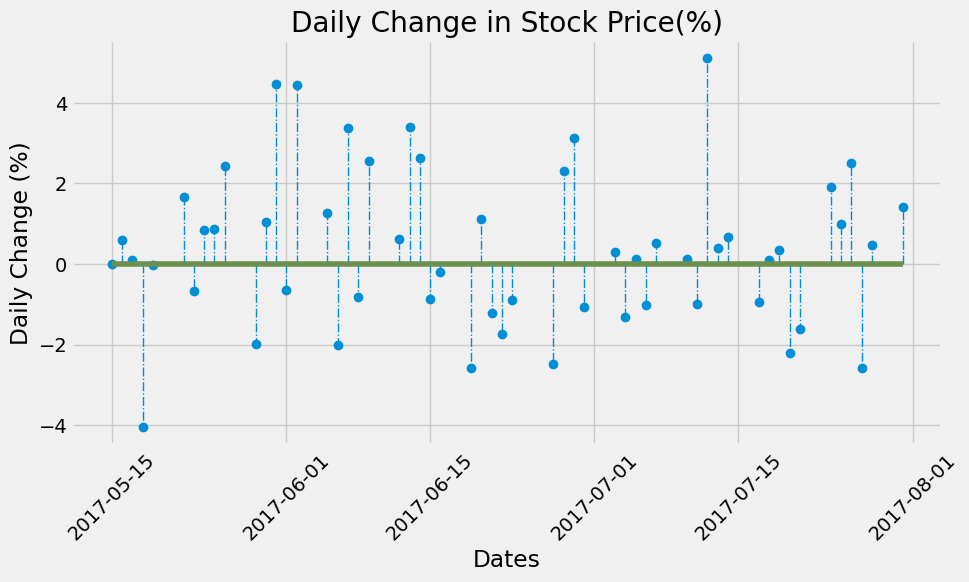

In [17]:
# Plot stem plot
plt.figure(figsize=(10,5))
markerline, stemlines, baseline = plt.stem(stock_data.index, stock_data.Day_Perc_Change, linefmt='-.', use_line_collection=True)
plt.setp(stemlines, 'linewidth', 1)
plt.title("Daily Change in Stock Price(%)")
plt.xlabel("Dates")
plt.ylabel("Daily Change (%)")
plt.xticks(rotation=45)
plt.show()

In [18]:
stock_data[stock_data.Day_Perc_Change == min(stock_data.Day_Perc_Change)]

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,Day_Perc_Change,Trend
Date,,,,,,,,,,,,,,,,,,
2017-05-18,MUTHOOTFIN,EQ,395.15,393.0,395.45,375.1,378.85,379.2,386.45,646434,249811874.3,11171,238171,36.84,2017,5,-4.036442,Among top losers


- As you can see at 04 September 2018 closing price drop suddenly from 1400 to 737.
- 48% of daily change occur in one days.

## <a id=id3>Query 2.3 </a>
Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change. 


<img src="../images/2.png" alt="Drawing" style="width: 400px;" align="left"/>
<img src="../images/3.png" alt="Drawing" style="width: 400px;"/>

#### 2.3.1 Plot the daily volumes

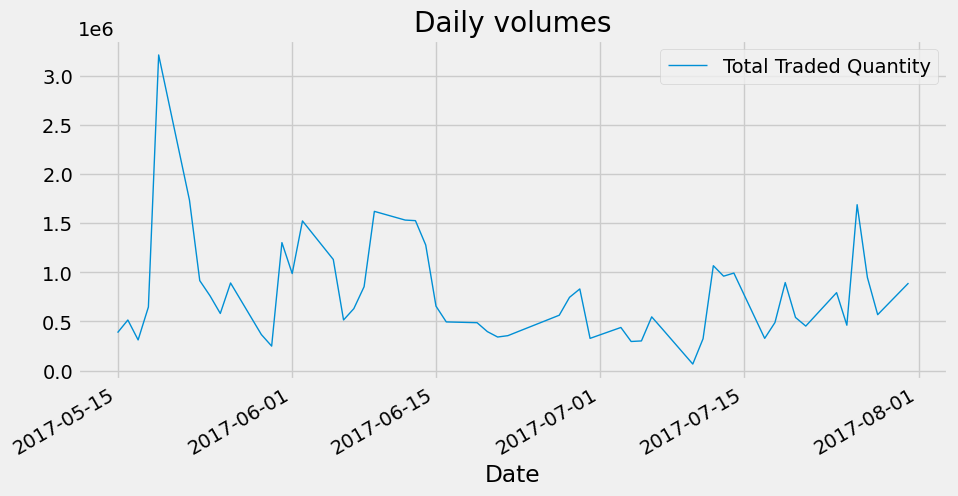

In [19]:
stock_data.plot(y="Total Traded Quantity", title="Daily volumes", linewidth=1, figsize=(10,5))
# plt.xlabel("Date")
plt.show()

#### 2.3.2 Comparing Volume and Daily Percentage change

C:\Users\ayith\AppData\Local\Temp\ipykernel_15824\3849356160.py:3: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  markerline, stemlines, baseline = plt.stem(stock_data.index, stock_data.Day_Perc_Change,label="Day_Perc_Change(%)", use_line_collection=True)


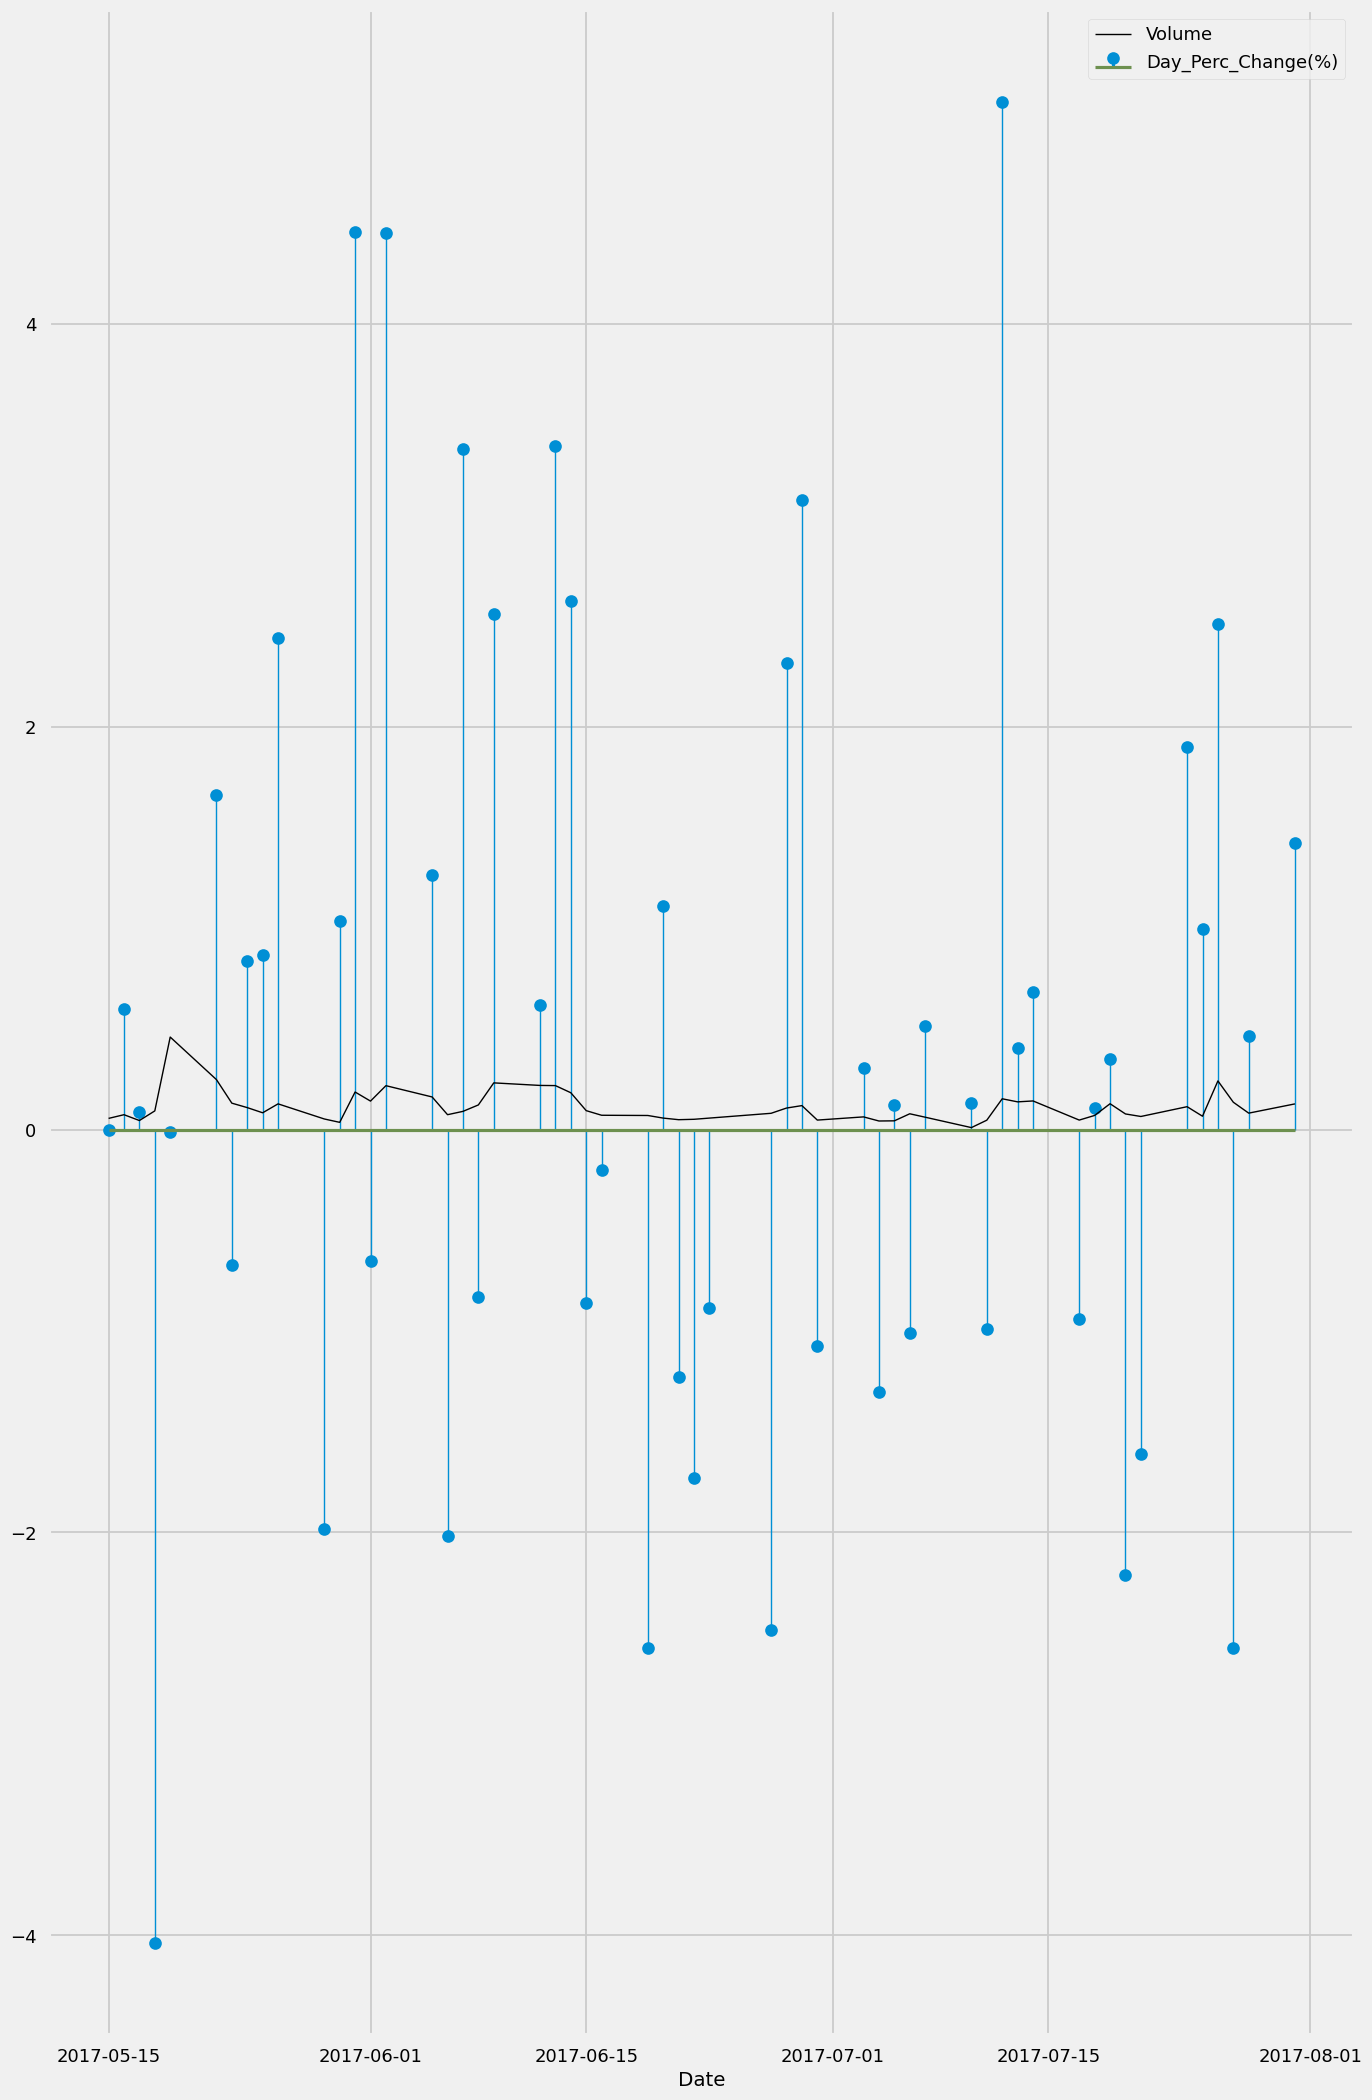

In [20]:
with plt.style.context(plt.style.available[23]):
    plt.figure(figsize=(15,25))
    markerline, stemlines, baseline = plt.stem(stock_data.index, stock_data.Day_Perc_Change,label="Day_Perc_Change(%)", use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 1)
    plt.plot(stock_data.index, stock_data["Total Traded Quantity"].values/7000000, color='k', linewidth=1, label="Volume")
    plt.xlabel("Date")
    plt.legend()
    plt.show()

#### 2.3.3 Analysis of the relationship between volume and daily percentage change
From above Plot,

1. **When `Volume` sunddenly increase, It means `Day_Perc_Change` either increased or decreased which affect Stock price directly.**<br><br>
E.g. When some news came up about company, it highly affect the stock price of the company
    - When there is **good news** about Company, People tend to buy the stock and **stock price start to increase**. Which means, at end of day **Volume is large**. It means Positive change happen in stock than previous day.
    - When there is **bad news** about Company, People tend to sell the stock and **stock price start to decrease**. Which means, at end of day **Volume is large**. It means negative change happen in stock than previous day.
<br><br>
2. **When `Day_Perc_Change` Varies sightly within range of 10%, Volume shows increment in proportion to it.**<br><br>
When closing price's percentage change in between -10% and 10% Volume increase. Means most of investors are likely to buy or sell the stock when it gives profit or loss of 10% only. Means Number of trade are large which means volume is large.
<br><br>
3. **When very large/drastic change happens in `Day_Perc_Change`, Sometimes Volume don't change that much.**<br><br>
When closing price's percentage change beyond range of -20% and 20% Volume don't react to it that much. Means most of investors don't sell the stock when it gives loss beyond 20%. Means Number of trade are decreases and volume is small. Obseve large spike of Day_Perc_Change in above plot.


Trading volume in itself doesn't affect stock price directly, but it does have a huge impact on the way that shares move.

## <a id=id4>Query 2.4 </a>
We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. 

<img src="../images/4.png" alt="Drawing" style="width: 400px;" align="left"/>
<img src="../images/5.png" alt="Drawing" style="width: 400px;"/>

In [21]:
# Grouping stock data 'Trend' wise
stock_data_trendwise = stock_data.groupby('Trend')

#### 2.4.1 Plot a pie chart for all the 'Trend'

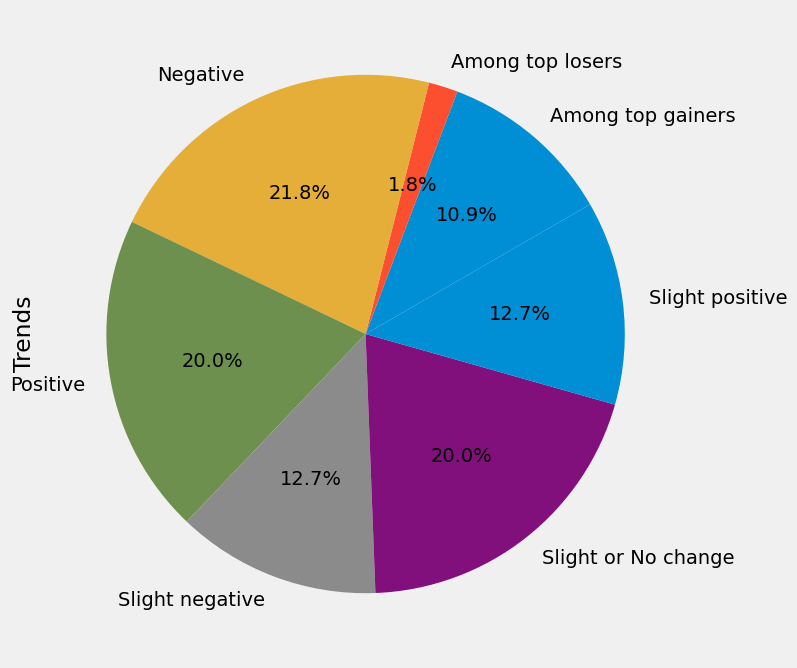

In [22]:
# Ploting Pie chart
stock_data_trendwise.size().plot.pie(figsize=(8,8),autopct='%1.1f%%', startangle=30, radius=1)
plt.ylabel('Trends')
plt.show()

#### 2.4.2 BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [23]:
mean_median = stock_data_trendwise['Total Traded Quantity'].agg(['mean', 'median'])
mean_median

,mean,median
Trend,,
Among top gainers,1.146290e+06,1184619.5
Among top losers,6.464340e+05,646434.0
Negative,4.779779e+05,469608.0
Positive,1.037597e+06,891020.0
Slight negative,6.369736e+05,655299.0
Slight or No change,7.384137e+05,488523.0
Slight positive,7.525700e+05,580979.0


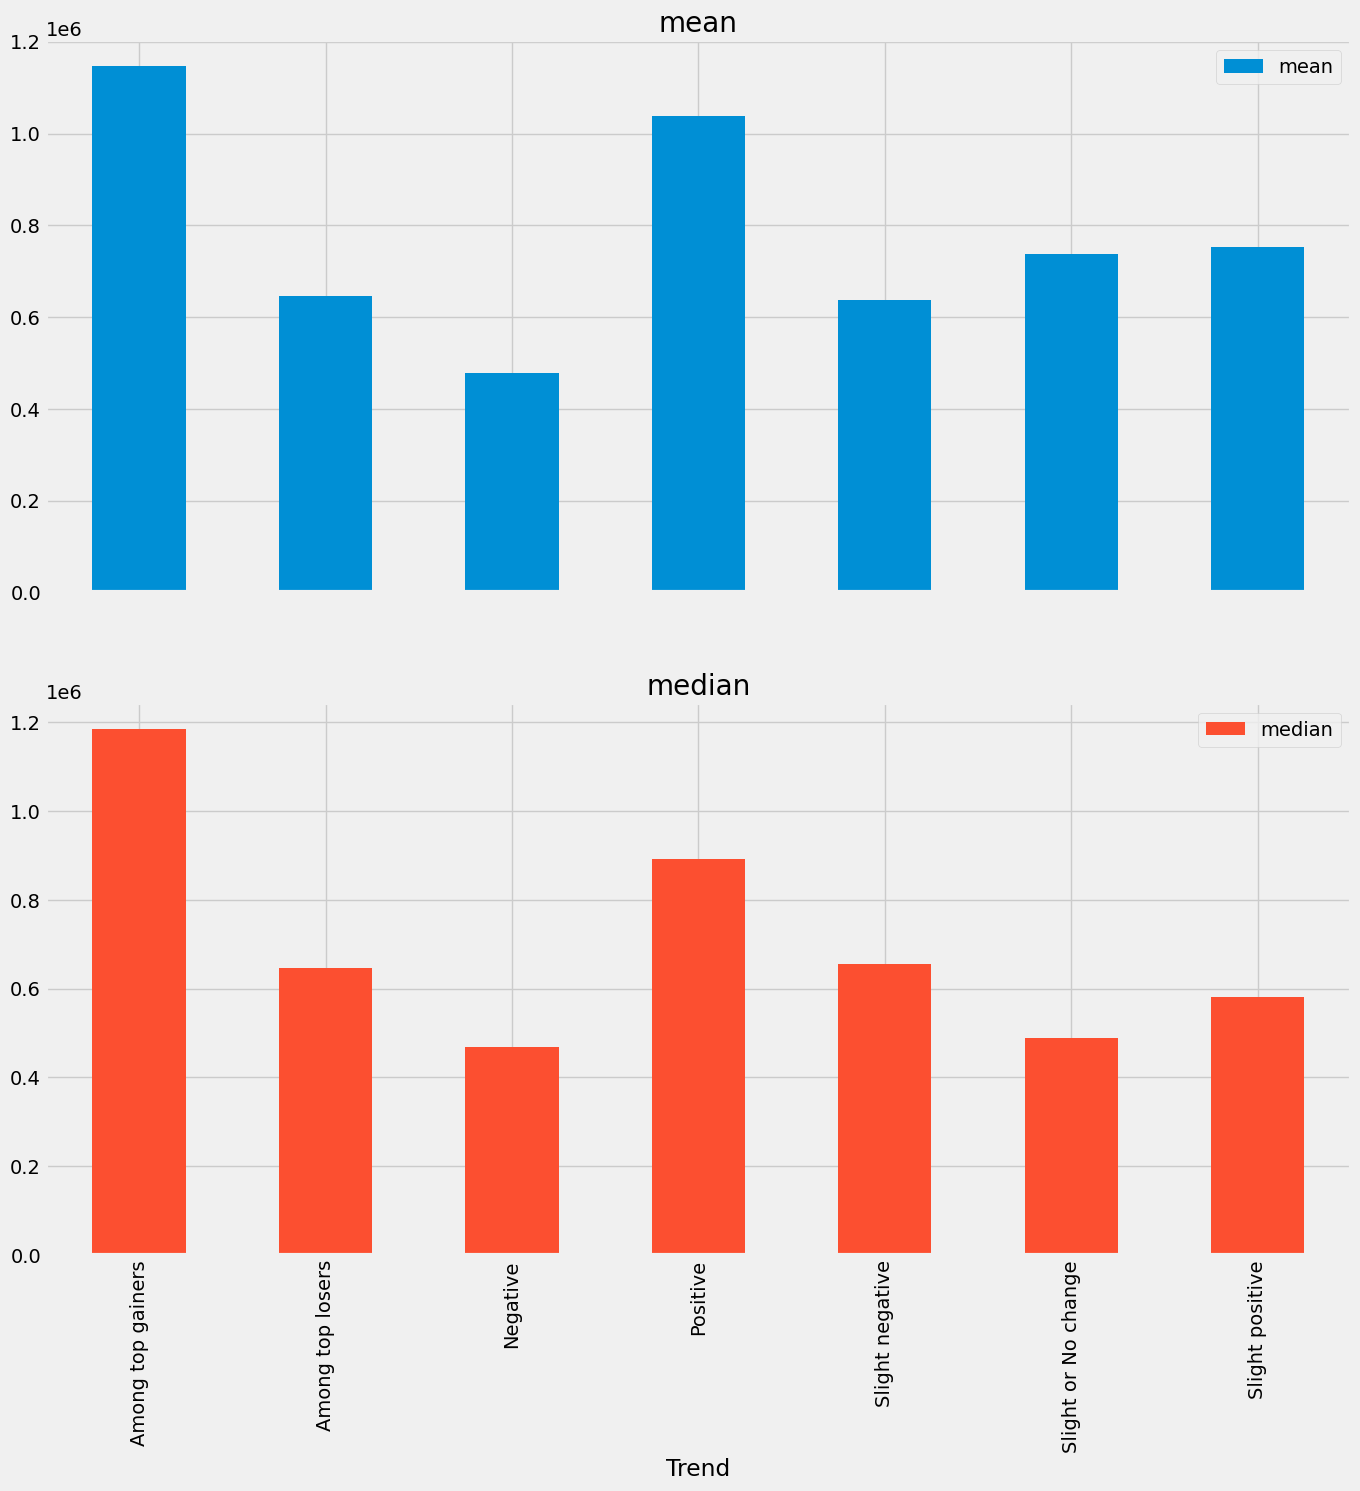

In [24]:
# Bar plot of mean and median w.r.t to Trends
mean_median[['mean','median']].plot(kind='bar', subplots=True, figsize=(15,15))
plt.show()

## <a id=id5>Query 2.5 </a>
Plot the daily return (percentage) distribution as a histogram.<br>
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes .

In [25]:
Category_bins = [stock_data.Day_Perc_Change.min(), -7, -3, -1, -0.5, 0.5, 1, 3, 7]

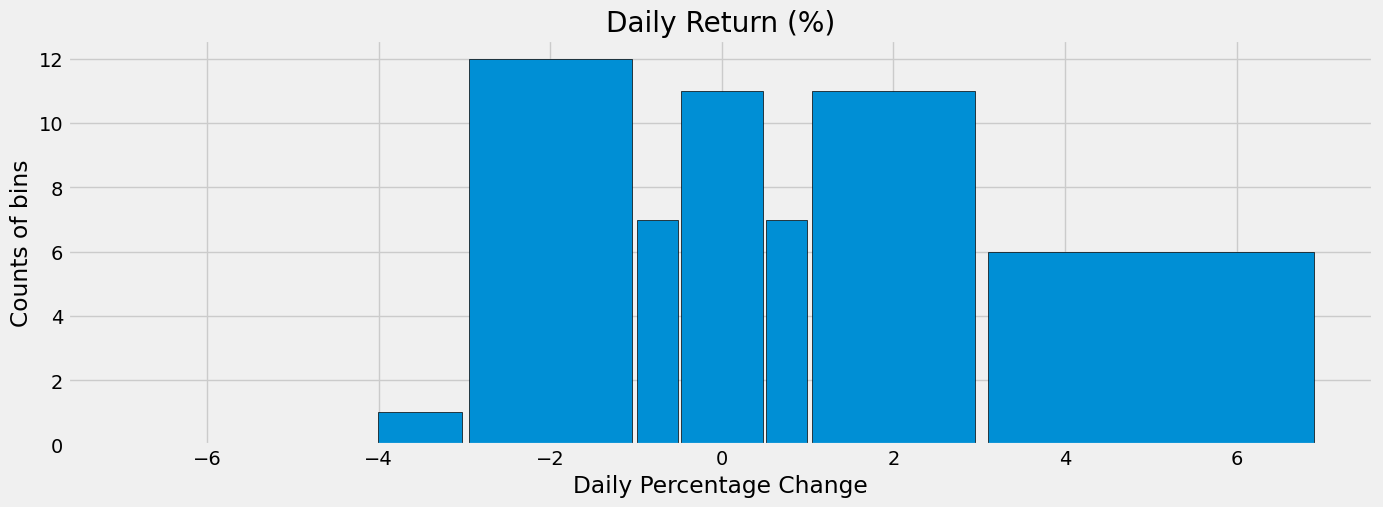

In [28]:
Category_bins = sorted(Category_bins)  # Ensure bins are in ascending order
stock_data.Day_Perc_Change.hist(bins=Category_bins, edgecolor='k', log=False, figsize=(15,5), rwidth=0.95)
plt.title('Daily Return (%)')
plt.ylabel('Counts of bins')
plt.xlabel('Daily Percentage Change')
plt.show()

## <a id=id6>Query 2.6 </a>
We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on [correlation](https://www.investopedia.com/terms/c/correlation.asp) and [diversification](https://www.investopedia.com/terms/d/diversification.asp). 

<img src="../images/7.png" alt="Drawing" style="width: 500px;" align="left"/>

#### 2.6.1 Load any 5 stocks of your choice into 5 dataframes.

In [29]:
lt_stock = pd.read_csv("./LT.csv")
pnb_stock = pd.read_csv("./PNB.csv")
suzlon_stock = pd.read_csv("./SUZLON.csv")
tatachem_stock = pd.read_csv("./TATACHEM.csv")
tatapower_stock = pd.read_csv("./TATAPOWER.csv")

#### 2.6.2 Retain only rows for which ‘Series’ column has value ‘EQ’

And also reset the number of index

In [30]:
lt_stock = lt_stock[lt_stock.Series == 'EQ'].reset_index(drop=True)
pnb_stock = pnb_stock[pnb_stock.Series == 'EQ'].reset_index(drop=True)
suzlon_stock = suzlon_stock[suzlon_stock.Series == 'EQ'].reset_index(drop=True)
tatachem_stock = tatachem_stock[tatachem_stock.Series == 'EQ'].reset_index(drop=True)
tatapower_stock = tatapower_stock[tatapower_stock.Series == 'EQ'].reset_index(drop=True)

#### 2.6.3 Create a single dataframe which contains the ‘Closing Price’ of each stock. Rename each column to the name of the stock that is contained in the column.

In [31]:
close_price_stock = pd.concat({
    lt_stock.Symbol[0]:lt_stock['Close Price'],
    pnb_stock.Symbol[0]:pnb_stock['Close Price'],
    suzlon_stock.Symbol[0]:suzlon_stock['Close Price'],
    tatachem_stock.Symbol[0]:tatachem_stock['Close Price'], 
    tatapower_stock.Symbol[0]:tatapower_stock['Close Price']
}, axis=1)

close_price_stock.tail()

,LT,PNB,SUZLON,TATACHEM,TATAPOWER
489,1366.60,83.95,6.35,596.00,64.35
490,1360.35,83.95,5.95,590.25,64.50
491,1356.45,84.25,5.65,589.00,64.40
492,1355.50,86.25,6.40,590.00,63.80
493,1317.65,79.80,5.60,574.90,62.60


#### 2.6.4  Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.

In [32]:
pct_change_stock = close_price_stock.pct_change().dropna()
pct_change_stock.head()

,LT,PNB,SUZLON,TATACHEM,TATAPOWER
1,-0.000976,0.044065,0.005102,0.022388,0.003591
2,0.008474,-0.052254,0.010152,-0.009008,0.017889
3,-0.018713,-0.039685,0.005025,-0.020686,-0.018746
4,0.001132,-0.020820,0.030000,-0.013522,0.004776
5,0.015888,-0.027384,-0.009709,-0.028469,-0.024955


#### 2.6.5 Using seaborn, analyse the correlation between the percentage changes in the five stocks. 

This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. 

In [34]:
import seaborn as sns

In [35]:
# Printing Correlation between each columns
pct_change_stock.corr()

,LT,PNB,SUZLON,TATACHEM,TATAPOWER
LT,1.000000,0.237717,0.137295,0.184083,0.208746
PNB,0.237717,1.000000,0.278037,0.288115,0.276993
SUZLON,0.137295,0.278037,1.000000,0.233207,0.328770
TATACHEM,0.184083,0.288115,0.233207,1.000000,0.325402
TATAPOWER,0.208746,0.276993,0.328770,0.325402,1.000000


C:\Users\ayith\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


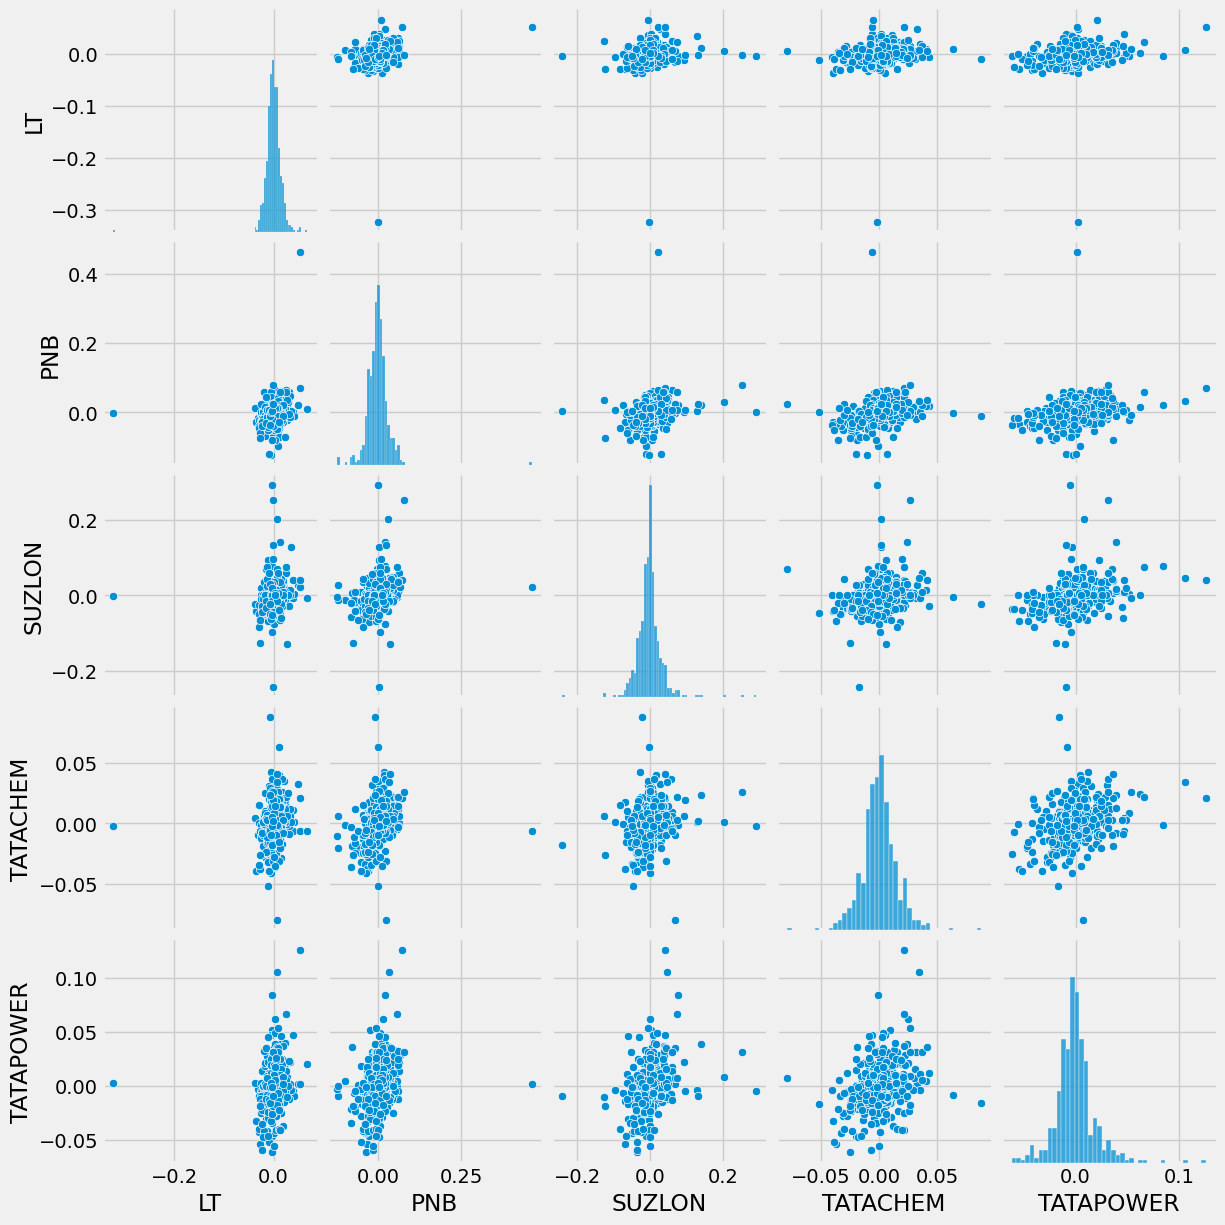

In [36]:
# Correlation between different daily percentage change between different company
sns.pairplot(pct_change_stock)
plt.show()

One Common conclusion we can get from this,
- There is no positive correlation between any two companies, means stock of one company do not affect / don't have relationship with other company.
- Investor can freely invest in all company cause change in one stock not affect other.Even TATA Chemical and TATA Power don't have correlation.
- All histogram plots are look like marginal distribution while all scatter plot look like joint distribution between two different company.

## <a id=id7>Query 2.7 </a>
Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on [volatility](https://www.investopedia.com/terms/v/volatility.asp) a read.<br>
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.<br>
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use. 

In [37]:
# LT Stock
rolling_lt = pct_change_stock.LT.rolling(7)

#### 2.7.1 Calculate the 7 day rolling average of the percentage change of any of the stock prices.

In [38]:
# Rolling Average
rolling_avg_lt = rolling_lt.mean()

# Using shift function to shift "7 day average" from next day 
# cause it considering average price of current day as well which is not correct
rolling_avg_lt = rolling_avg_lt.shift()

# Drop NaNs from dataframe
rolling_avg_lt = rolling_avg_lt.dropna()
rolling_avg_lt.head(10)

8    -0.004704
9     0.002593
10    0.002897
11    0.005155
12    0.003803
13    0.000979
14    0.004497
15    0.008416
16    0.002932
17   -0.000937
Name: LT, dtype: float64

#### 2.7.2 Then compute the standard deviation

In [39]:
std_dev_lt = rolling_lt.std().shift().dropna()
std_dev_lt.head(10)

8     0.016374
9     0.026540
10    0.026630
11    0.025120
12    0.025622
13    0.025153
14    0.025667
15    0.020722
16    0.010318
17    0.011917
Name: LT, dtype: float64

#### 2.7.3 Plot the Values

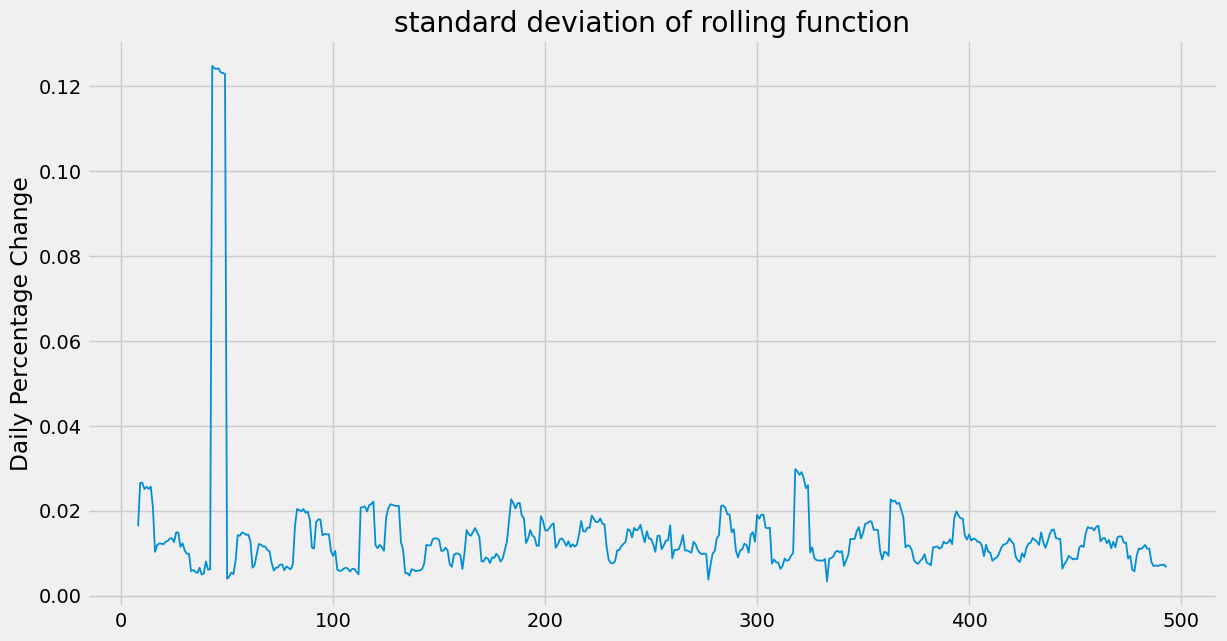

In [40]:
std_dev_lt.plot(figsize=(13,7), linewidth=1.3, title='standard deviation of rolling function')
plt.ylabel('Daily Percentage Change')
plt.show()

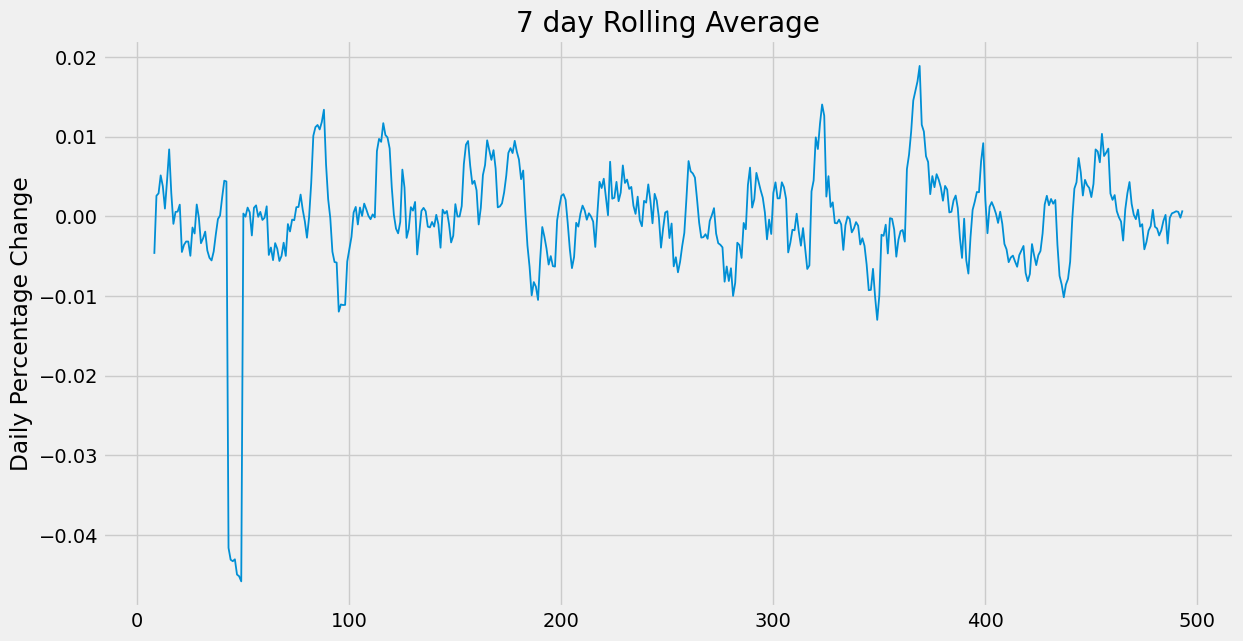

In [41]:
rolling_avg_lt.plot(figsize=(13,7), linewidth=1.3, title='7 day Rolling Average')
plt.ylabel('Daily Percentage Change')
plt.show()

## <a id=id8>Query 2.8 </a>
Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

<img src="../images/8.png" alt="Drawing" style="width: 500px;" align="left"/>

#### 2.8.1 Calculate Volatility of NIfty

In [43]:
# Reading and Importing nifty csv file
nifty50 = pd.read_csv('./Nifty50.csv')

# Convert the Date column to datatime64[ns] datatype
nifty50['Date'] = pd.to_datetime(nifty50['Date'], format='%d-%b-%Y')

# Convert the Date column as index column
nifty50.set_index('Date', inplace=True)

# Calculate the percentage change for Closing price of nifty50
nifty50_pct_change = nifty50.Close.pct_change().dropna()

# Calculate the volatility for nifty50
nifty50_volatility = nifty50_pct_change.rolling(7).std().shift().dropna()

nifty50_volatility.head()

Date
2017-05-25    0.005509
2017-05-26    0.008139
2017-05-29    0.008831
2017-05-30    0.007363
2017-05-31    0.007268
Name: Close, dtype: float64

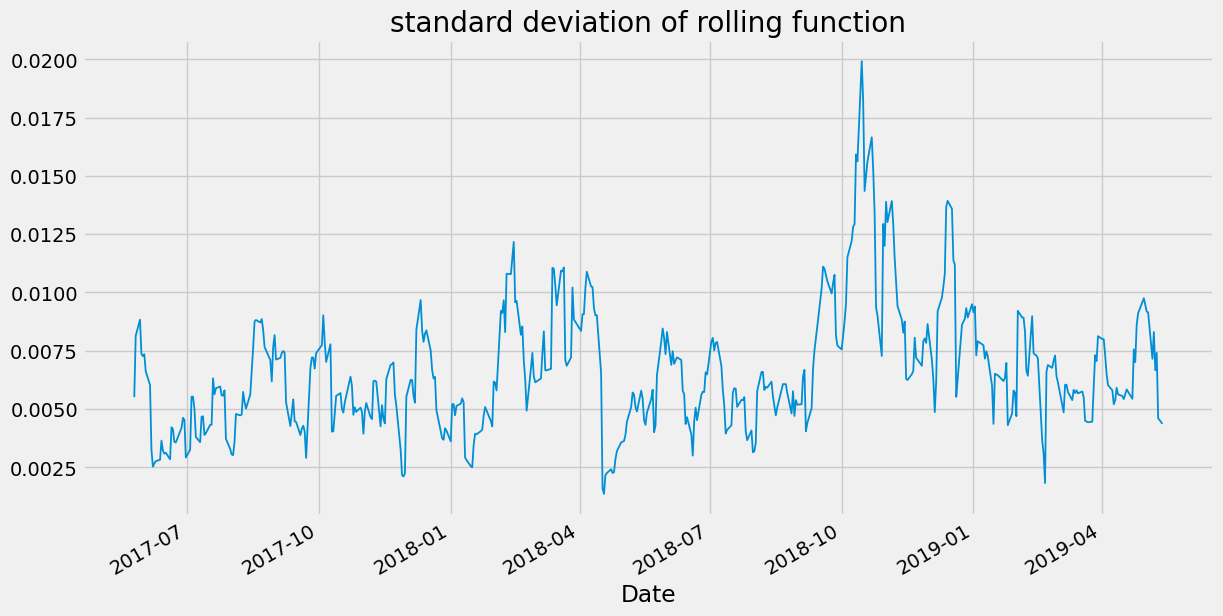

In [44]:
nifty50_volatility.plot(figsize=(13,7), linewidth=1.3, title='standard deviation of rolling function')
plt.show()

#### 2.8.1 compare the 2

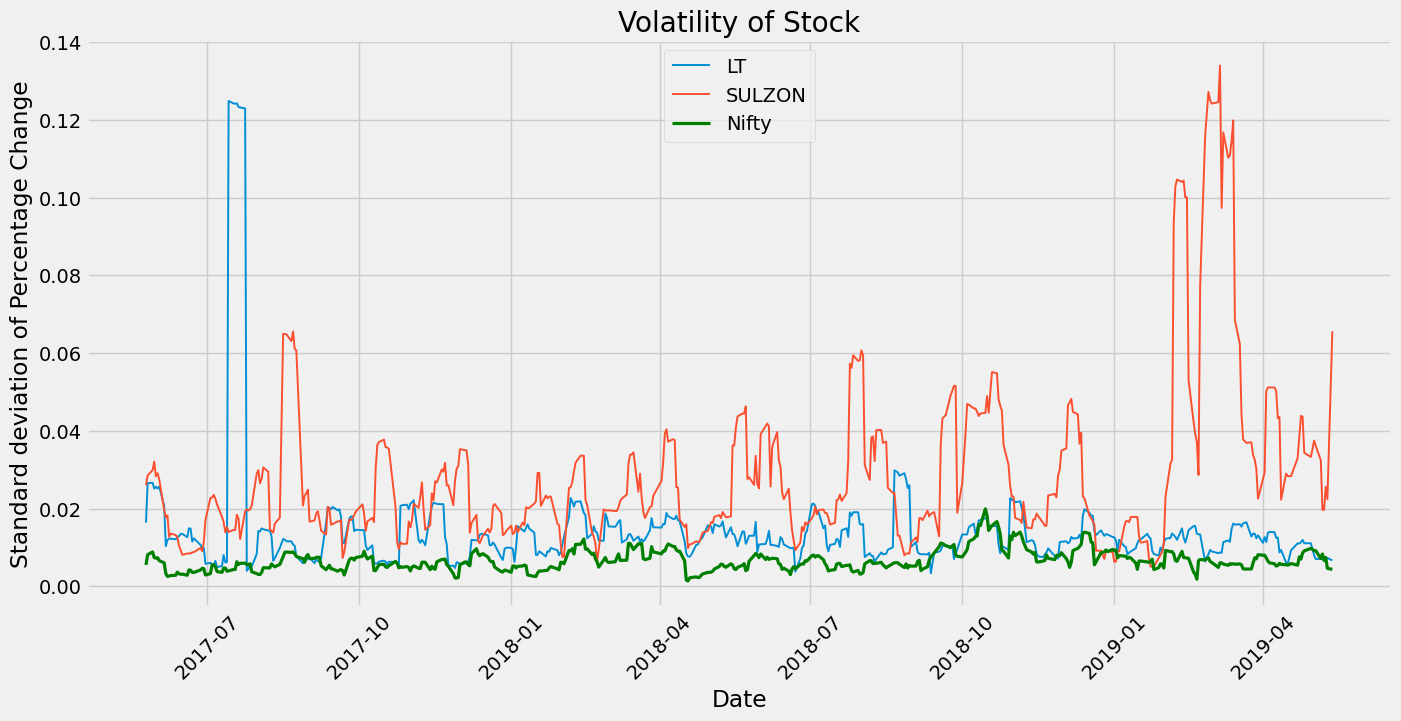

In [45]:
plt.figure(figsize=(15,7))

# Plot the all two volatility
plt.plot(nifty50_volatility.index, std_dev_lt, label='LT', linewidth=1.4)
plt.plot(nifty50_volatility.index, pct_change_stock.SUZLON.rolling(7).std().shift().dropna(), label='SULZON', linewidth=1.4)
plt.plot(nifty50_volatility.index, nifty50_volatility, label='Nifty', color='g', linewidth=2.3)

plt.title('Volatility of Stock')
plt.xlabel('Date')
plt.ylabel('Standard deviation of Percentage Change')
plt.xticks(rotation=45)
plt.legend()
plt.show()

## <a id=id9>Query 2.9 </a>
 Trade Calls - Using Simple Moving Averages. Study about moving averages [here](https://www.investopedia.com/terms/s/sma.asp). 
 
 <img src="../images/9.png" alt="Drawing" style="width: 500px;" align="center"/>

Plot the 21 day and 34 day Moving average with the average price and decide a Call !
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average.
One of the most widely used technical indicators.

### Moving average 
- **Support and resistance level indicator**
- It can help filter out the noise from random price movements and smooth it out in order to see the average value.

#### Moving Average used for
 - Identify Trends
 - Confirm reversals
 - Identify areas of support
 - Identify areas of resistance
 
<img src='./images/moving_avg_trends.png' style="width: 500px;"/>

#### Disadvantage
- Based on past prices
- Lagging Indicator 
- It will not warn in advance (It will confirm when a trend change has taken place.)

#### How to use it for buy/sell ?
 
 - When price crosses up and over the moving average ==> It's signal to **Buy**.
 - When price crosses down and under the moving average ==> It's signal to **Sell**.
 
 <img src='./images/how_to_use_moving_avg.png' style="width: 500px;"/> 
 
 #### Type of Moving Average
 
 1. Simple Moving Average (SMA)
 2. Weighted Moving Average (WMA)
 3. Exponential Moving Average (EMA)
 
 #### Simple Moving Average (SMA)
 - For 10 days moving Average
     - add last 10 days of closing price and Divide by 10
     
     $p(E) = \prod_{j=0}^{10}\frac{Closing Price}{10}$
     
     
 - **LONGER SMA PERIOD --> MORE LAG, SLOWER TO REACT**
 - Downside 
     - SMA responds slower to rapid price changes because of equal weight to all periods
 - Counter Side
     - Use Weighted & Exponential Moving Average,
         - Which Repsond faster to price action 
         - More weight to recent periods
         - less weight to older periods
         - Reflect a quicker shift in sentiment
 #### Commonly used time period
     - 10-20 for short-term trends
     - 50 for mid-term trends
     - 200 for long-term trends

<img src='./images/ema_vs_sma.png' style="width: 500px;"/>

#### 9.1 Generate moving averages

In [46]:
stock_data['SMA_21'] = stock_data['Average Price'].rolling(21).mean()
stock_data['SMA_34'] = stock_data['Average Price'].rolling(34).mean()

#### 9.2 Save moving averages for the day before

In [47]:
prev_short_mavg = stock_data['SMA_21'].shift(1)
prev_long_mavg = stock_data['SMA_34'].shift(1)

#### 9.3 Select buying and selling signals: where moving averages cross

In [48]:
buys = stock_data.loc[(stock_data['SMA_21'] <= stock_data['SMA_34']) & (prev_short_mavg >= prev_long_mavg)]
sells = stock_data.loc[(stock_data['SMA_21'] >= stock_data['SMA_34']) & (prev_short_mavg <= prev_long_mavg)]

#### 9.4 Plotting Trade Calls 

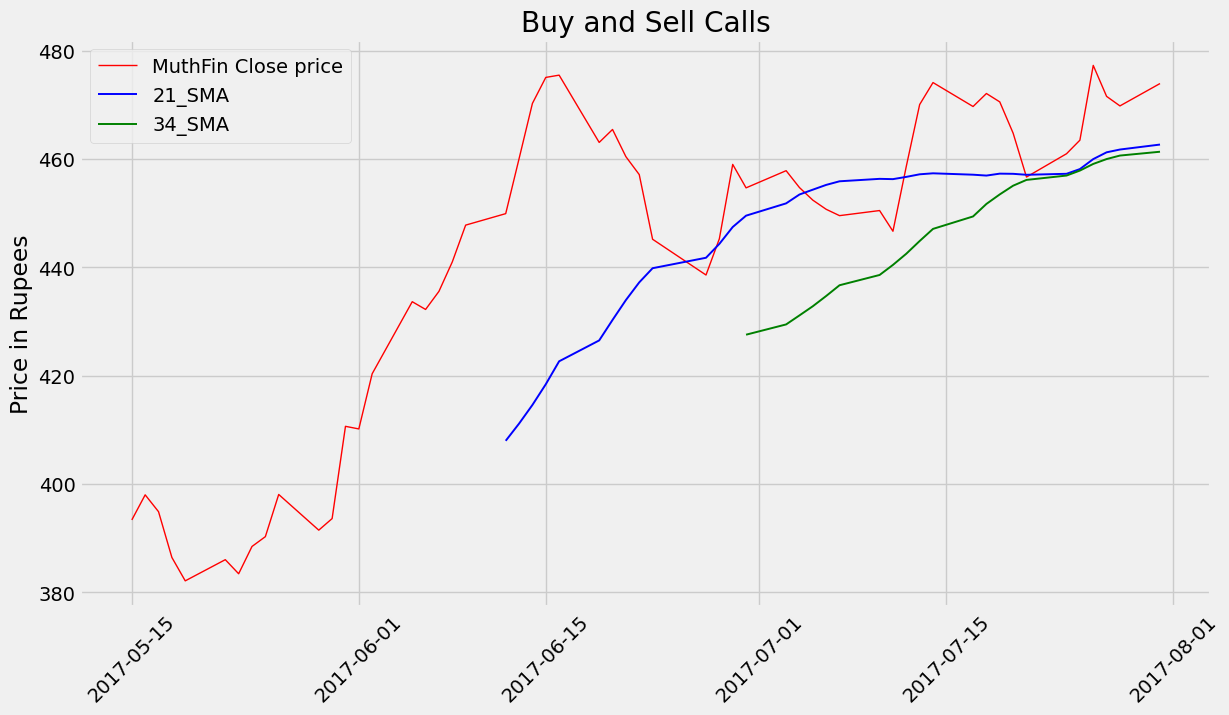

In [50]:
# The label parameter is useful for the legend
plt.figure(figsize=(13,7))
plt.plot(stock_data.index, stock_data['Average Price'], linewidth=1, label='MuthFin Close price', color='r')
plt.plot(stock_data.index, stock_data['SMA_21'], linewidth=1.4, label='21_SMA', color='b')
plt.plot(stock_data.index, stock_data['SMA_34'], linewidth=1.4, label='34_SMA', color='g')

# Put each marker of buy and sell at the specific date
plt.plot(buys.index, stock_data.loc[buys.index]['SMA_21'], '^', markersize=10, color='g')
plt.plot(sells.index, stock_data.loc[sells.index]['SMA_21'], 'v', markersize=10, color='k')

# Doing the styling formatting
plt.ylabel("Price in Rupees")
plt.title("Buy and Sell Calls")
plt.xticks(rotation=45)
plt.legend()
plt.show()

## <a id=id10>Query 2.10 </a>

Trade Calls - [Using Bollinger Bands](https://www.investopedia.com/terms/b/bollingerbands.asp)<br>
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average<br>
The bollinger bands comprise the following data points-
- The 14 day rolling mean of the closing price (we call it the average) 
- Upper band which is the rolling mean + 2 standard deviations away from the average. 
- Lower band which is the rolling mean - 2 standard deviations away from the average. 
- Average Daily stock price.

Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.<br>
Observe the bands yourself , and analyse the accuracy of all the trade signals provided by the bollinger bands.
Save to a new csv file. 
<img src="../images/10.png" alt="Drawing" style="width: 500px;" align="left"/>

#### 10.1 Calculate 14 day rolling mean and standard deviations

In [51]:
# Calculating 14 days moving average
stock_data['SMA_14'] = stock_data['Average Price'].rolling(14).mean()
# Calculating Standard deviation for 14 days
stock_data['SD_14'] = stock_data['Average Price'].rolling(14).std()

#### 10.2 Calculating upper and lower bollinger bands

In [52]:
# Upper Bollinger Bands = Mean + 2*SD
stock_data['upper_band'] = stock_data.SMA_14 + 2*stock_data.SD_14
# Lower Bollinger Bands = Mean - 2*SD
stock_data['lower_band'] = stock_data.SMA_14 - 2*stock_data.SD_14

#### 10.3 Plotting Bollinger Bands

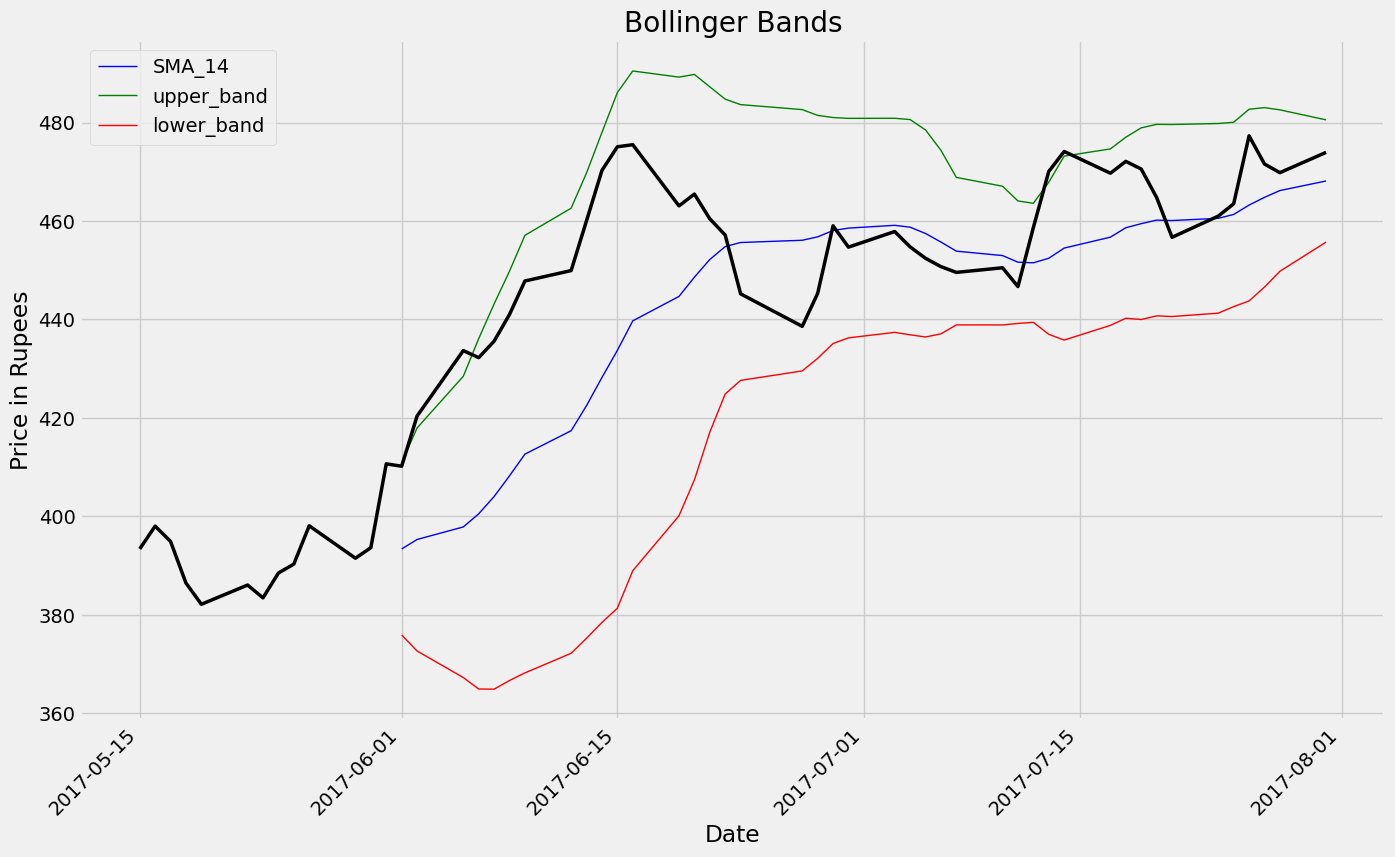

In [53]:
# plt.figure(figsize=(15,10))
stock_data[['SMA_14', 'upper_band', 'lower_band']].plot(figsize=(15,10), linewidth=1, color=['b', 'g', 'r'])
stock_data['Average Price'].plot(figsize=(15,10), linewidth=2.5, color='k')
plt.title("Bollinger Bands")
plt.ylabel('Price in Rupees')
plt.xticks(rotation=45)
plt.show()

## Save the `stock_data` dataframe

In [54]:
# Save the dataframe as "week2.csv" file
stock_data.to_csv('./muthfin3.csv')